## MIGRAINE

[The Dataset](https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction) contains numeric values of patients well-being / ailments with a target of migraine types.  
<br>  
***
## Table of contents
1. [Data analysis](#1.-Data-analysis)
2. [OneHotEncoding](#2.-OneHotEncoding)
3. [Artificial Neutral Network setup](#3.-Artificial-Neutral-Network-setup)
4. [Optimization](#4.-Optimization) <br>
    4.1 [Activation functions](#4.1-Activation-functions) <br>
    4.2 [Learning rate](#4.2-Learning-rate)<br>
    4.3 [Neurons number](#4.3-Neurons-number)<br>
5. [Optimized ANN](#5.-Optimized=ANN)<br>
6. [Results](#6-Results)<br>
<br>
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras import layers

[back to 'Table of contents'](##Table-of-contents)
***
#### 1. Data analysis

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

- Columns and their unique values

In [4]:
for i in df.columns[0:-1]:
    print(f"{i}: {df[i].sort_values().unique()}")

Age: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 64 67 68
 69 70 77]
Duration: [1 2 3]
Frequency: [1 2 3 4 5 6 7 8]
Location: [0 1 2]
Character: [0 1 2]
Intensity: [0 1 2 3]
Nausea: [0 1]
Vomit: [0 1]
Phonophobia: [0 1]
Photophobia: [0 1]
Visual: [0 1 2 3 4]
Sensory: [0 1 2]
Dysphasia: [0 1]
Dysarthria: [0 1]
Vertigo: [0 1]
Tinnitus: [0 1]
Hypoacusis: [0 1]
Diplopia: [0 1]
Defect: [0 1]
Ataxia: [0]
Conscience: [0 1]
Paresthesia: [0 1]
DPF: [0 1]


- Removing column "Ataxia" due it contains only one value, so it would not affect Artificial Neutral Network

In [5]:
x = df.drop(columns=["Ataxia", "Type"])

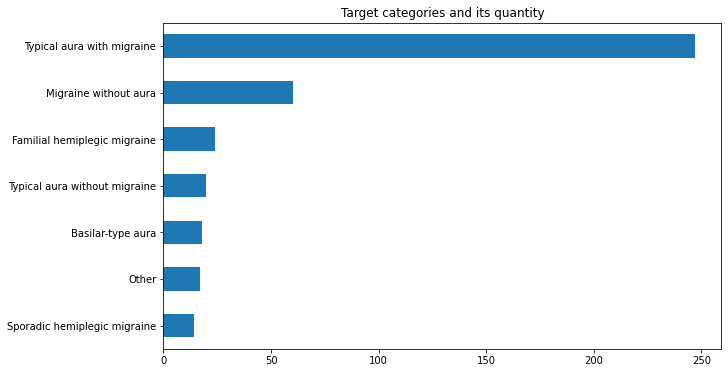

In [6]:
y = df.iloc[:,-1]
y.value_counts(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Target categories and its quantity");

[back to 'Table of contents'](##Table-of-contents)
***
#### 2. OneHotEncoding

In [7]:
from sklearn.preprocessing import OneHotEncoder
y = pd.DataFrame(y)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

[back to 'Table of contents'](##Table-of-contents)
***
#### 3. Artificial Neutral Network setup

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
def plot_loss_acc(results, title=None):
    fig=plt.figure(figsize=(20,7))
    plt.plot(results.history['loss'])
    plt.plot(results.history['accuracy'])
    plt.legend(["loss","accuracy"])
    plt.yticks(np.arange(0, 1.05, .05))
    plt.grid(alpha=.5)
    plt.title(title)
    plt.show()

[back to 'Table of contents'](##Table-of-contents)
***
#### 4.1 Activation functions

- RELU

In [10]:
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=x_train.shape[1]))
model.add(layers.Dense(50, activation="relu", name="ukryta_1"))
model.add(layers.Dense(len(y[0]), name="WYJSCIE"))
model.add(layers.Softmax())

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

results = model.fit(x_train, y_train, batch_size=100, epochs=150, verbose=0)

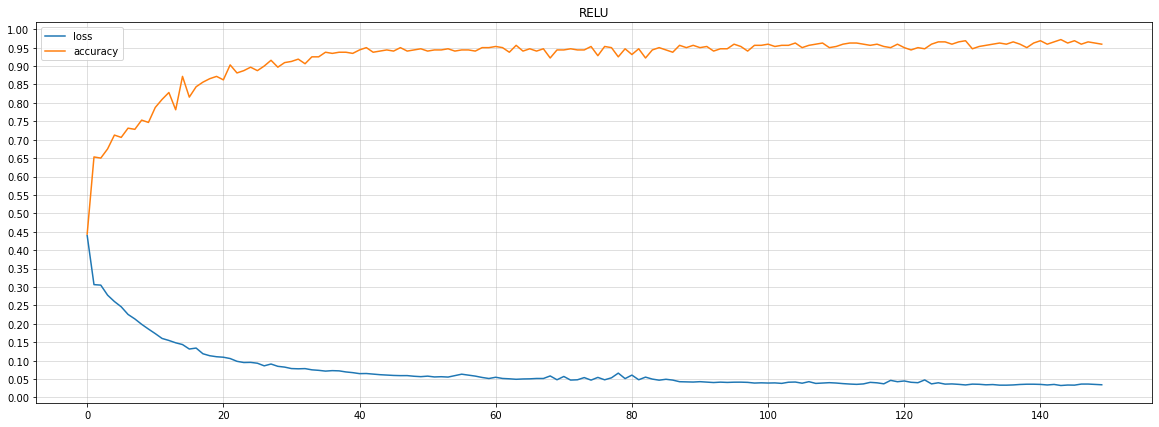

In [11]:
plot_loss_acc(results,"RELU")

- Sigmoid

In [12]:
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=x_train.shape[1]))
model.add(layers.Dense(50, activation="sigmoid", name="ukryta_1"))
model.add(layers.Dense(len(y[0]), name="WYJSCIE"))
model.add(layers.Softmax())

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

results = model.fit(x_train, y_train, batch_size=100, epochs=150, verbose=0)

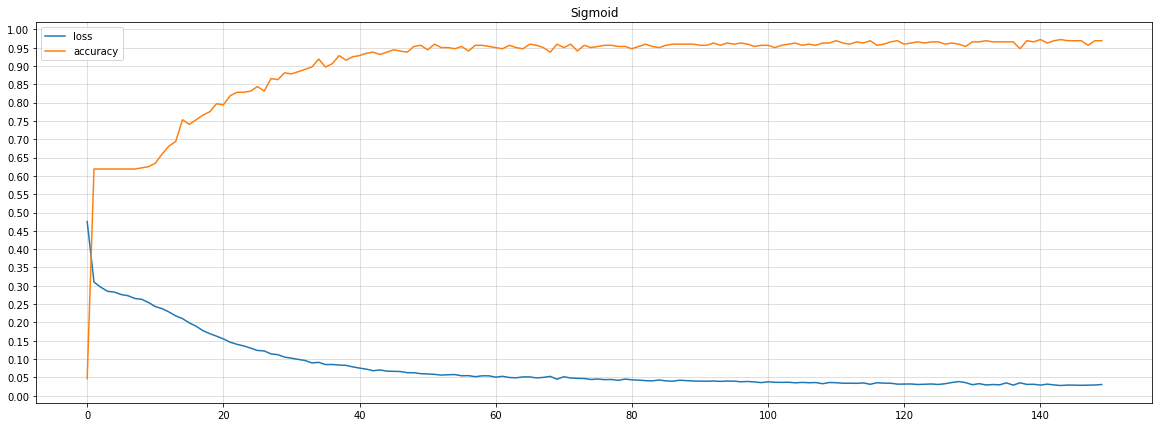

In [13]:
plot_loss_acc(results,"Sigmoid")

_Simgoid activation has slightly better accuracy and it's more stable_

[back to 'Table of contents'](##Table-of-contents)
***
#### 4.2 Learning rate

learning rate 0.005 | loss: 0.04059 | acc: 0.95625 


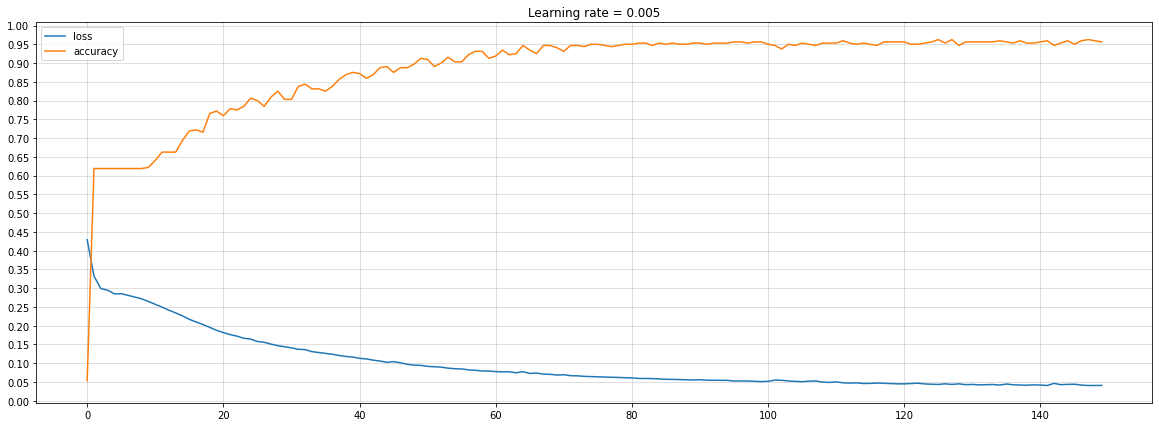

learning rate 0.0075 | loss: 0.03737 | acc: 0.95625 


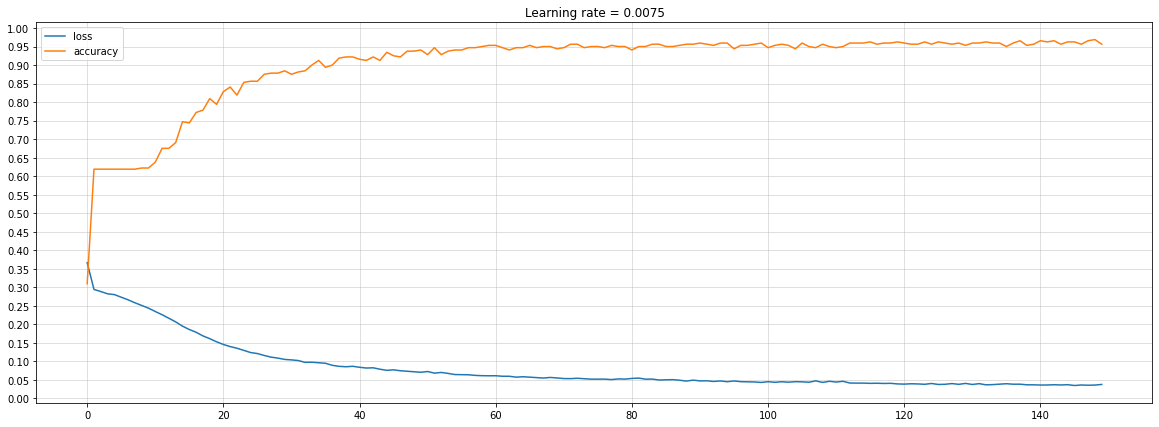

learning rate 0.01 | loss: 0.03089 | acc: 0.96562 


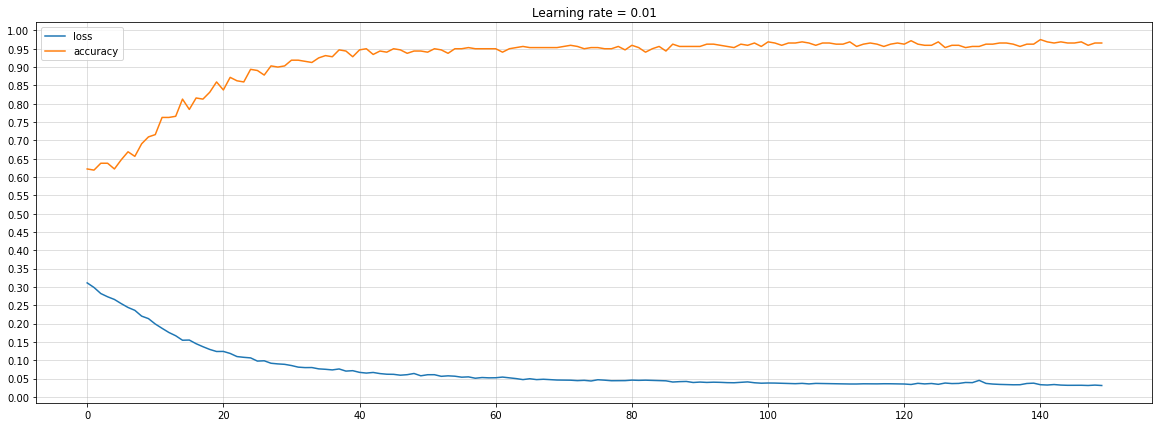

learning rate 0.025 | loss: 0.02135 | acc: 0.97500 


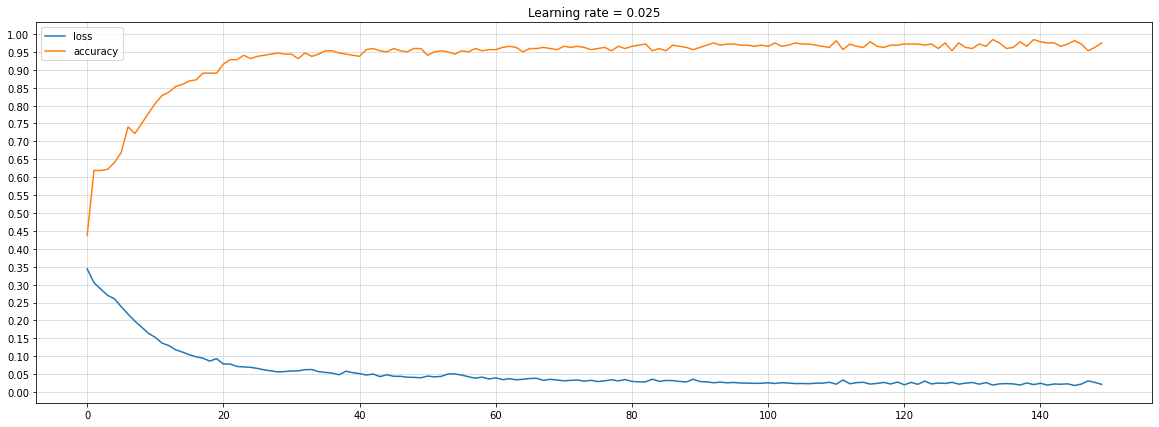

learning rate 0.05 | loss: 0.02219 | acc: 0.97500 


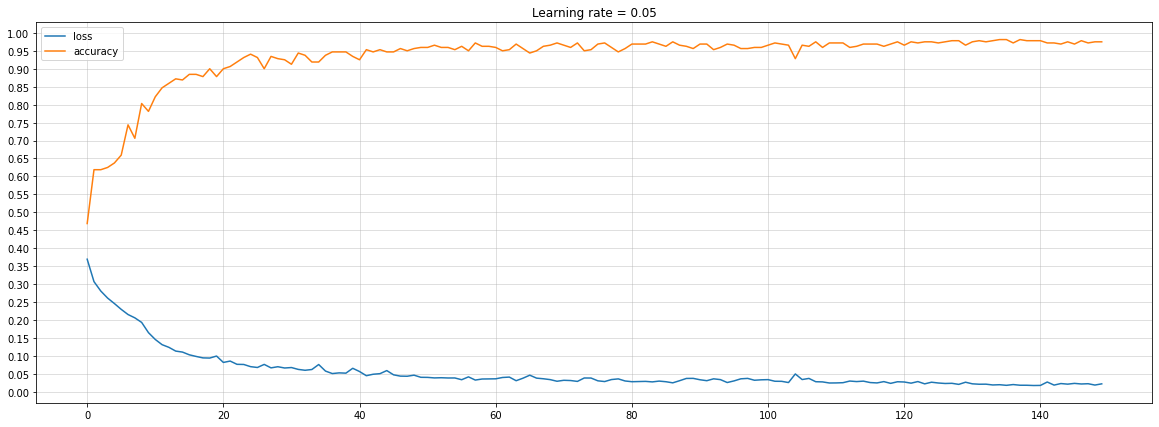

learning rate 0.1 | loss: 0.09169 | acc: 0.88750 


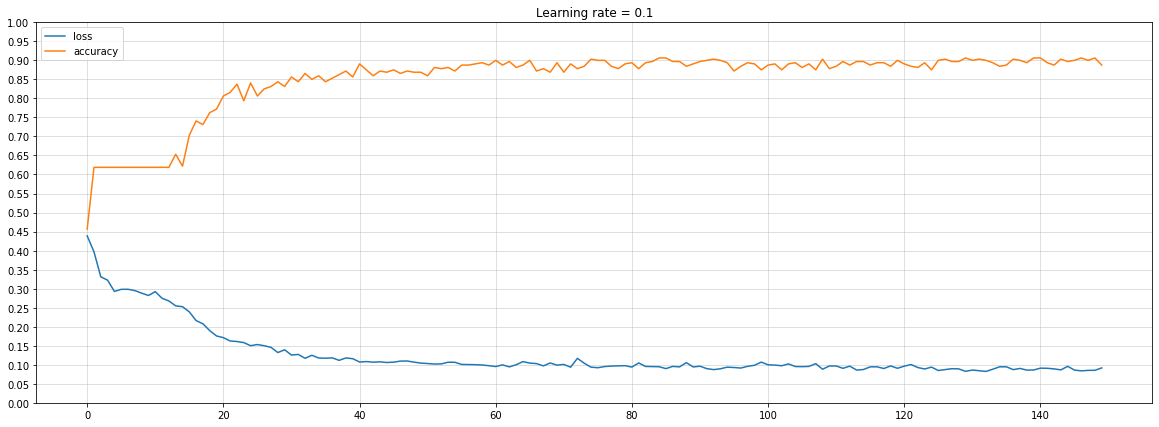

In [14]:
lr = [0.005, 0.0075, 0.01, 0.025, 0.05, 0.1]

for l in lr:
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=x_train.shape[1]))
    model.add(layers.Dense(50, activation="sigmoid", name="ukryta_1"))
    model.add(layers.Dense(len(y[0]), name="WYJSCIE"))
    model.add(layers.Softmax())

    opt = tf.keras.optimizers.Adam(l)
    model.compile(optimizer=opt,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    results = model.fit(x_train, y_train, batch_size=100, epochs=150, verbose=0)
    loss = results.history["loss"][-1]
    acc = results.history["accuracy"][-1]
    print(f"learning rate {l} | loss: {loss:.5f} | acc: {acc:.5f} ")
    plot_loss_acc(results, title=f"Learning rate = {l}")

_learning rate 0.01 ~ 0.025 seems to be optimal_

[back to 'Table of contents'](##Table-of-contents)
***
#### 4.3 Neurons number

neurons count 10 | loss: 0.03915 | acc: 0.96250 


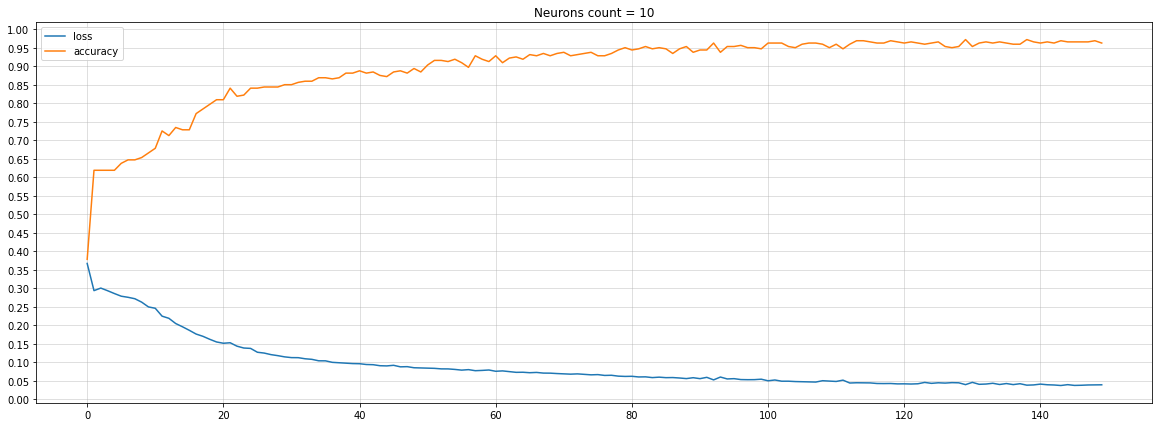

neurons count 25 | loss: 0.02080 | acc: 0.97500 


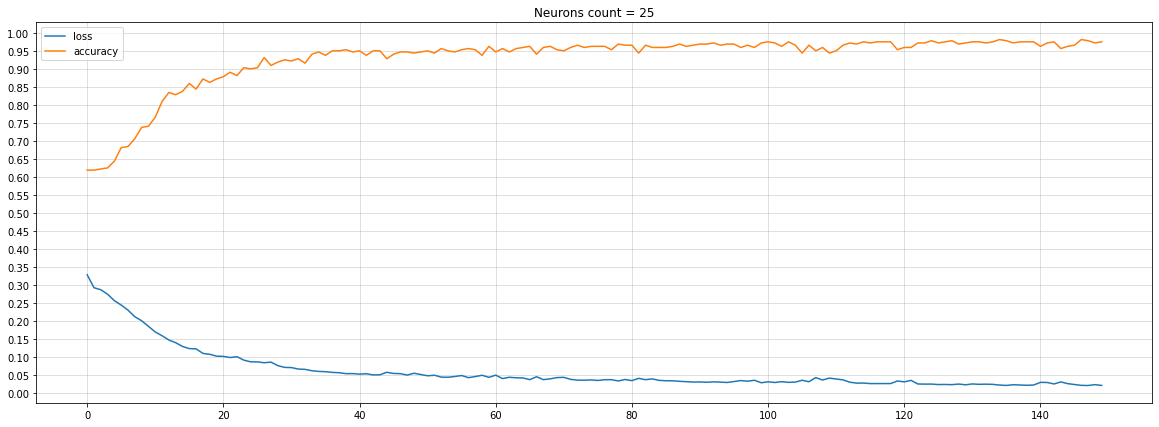

neurons count 50 | loss: 0.02444 | acc: 0.96562 


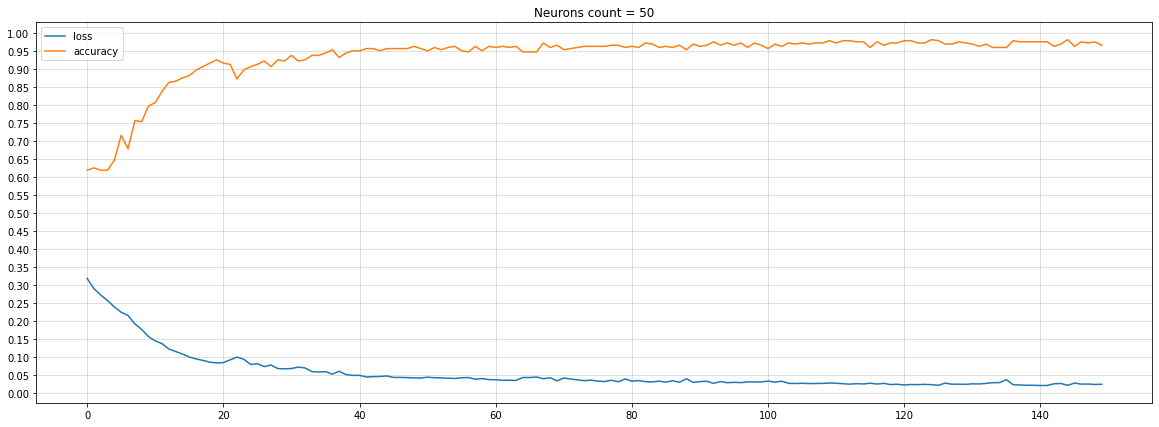

neurons count 75 | loss: 0.02291 | acc: 0.96875 


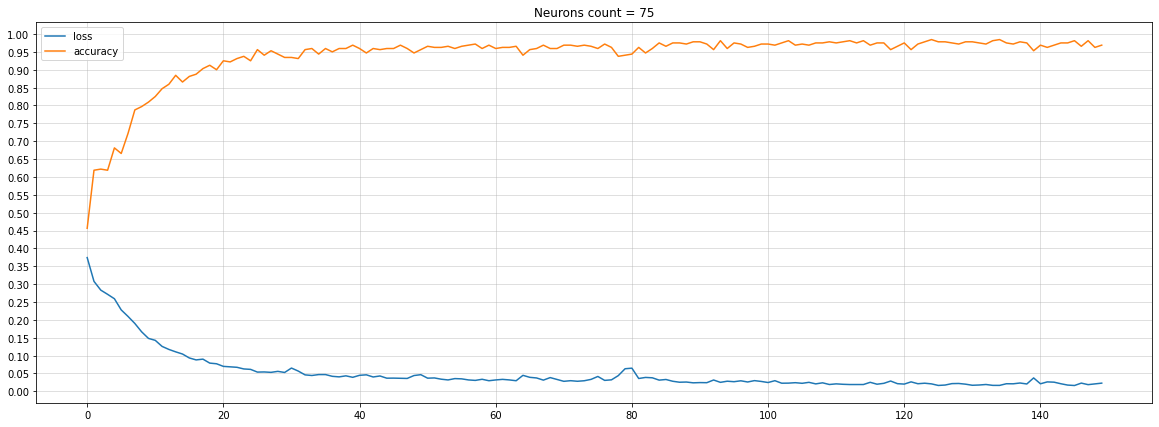

neurons count 100 | loss: 0.01770 | acc: 0.98125 


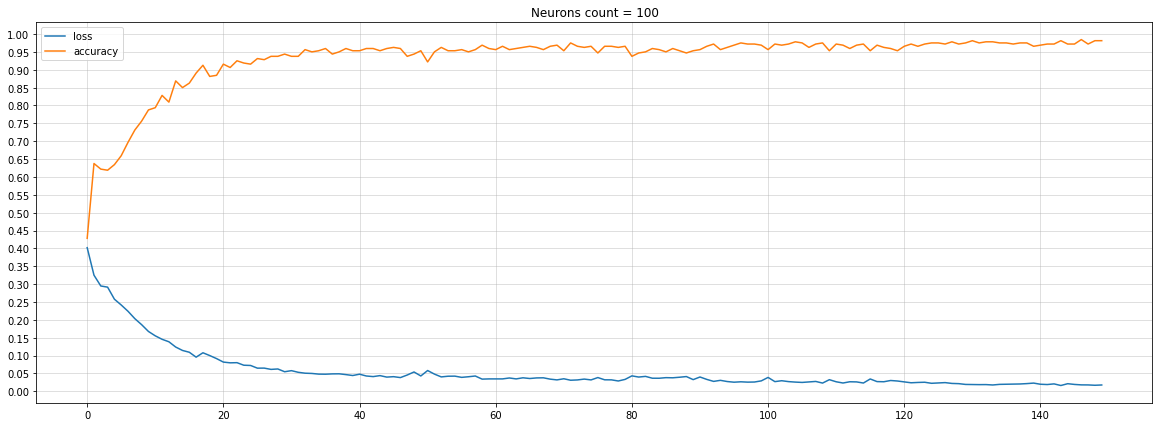

neurons count 150 | loss: 0.02354 | acc: 0.96875 


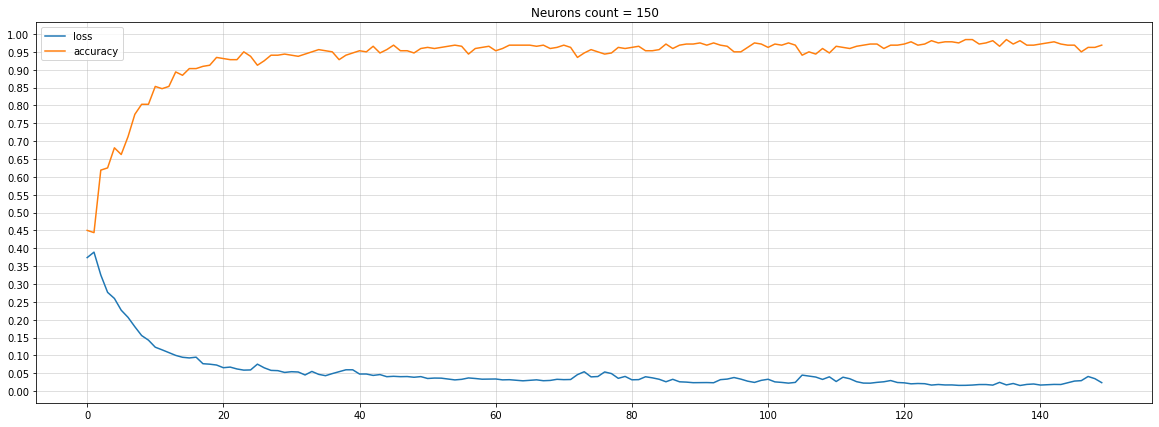

In [15]:
neuro = [10, 25, 50, 75, 100, 150]

for n in neuro:
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=x_train.shape[1]))
    model.add(layers.Dense(n, activation="sigmoid", name="ukryta_1"))
    model.add(layers.Dense(len(y[0]), name="WYJSCIE"))
    model.add(layers.Softmax())

    opt = tf.keras.optimizers.Adam(learning_rate= 0.025)
    model.compile(optimizer=opt,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    results = model.fit(x_train, y_train, batch_size=100, epochs=150, verbose=0)
    loss = results.history["loss"][-1]
    acc = results.history["accuracy"][-1]
    print(f"neurons count {n} | loss: {loss:.5f} | acc: {acc:.5f} ")
    plot_loss_acc(results, title=f"Neurons count = {n}")

_Neurons number betwen 50-100 ensures better accuracy and lowest loss_

[back to 'Table of contents'](##Table-of-contents)
***
#### 5. Optimized ANN

learnining rate = 0.025  
neurons number in hidden layer = 50  
epochs = 100 _(almost the same results as 150 epochs)_

In [16]:
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=x_train.shape[1]))
model.add(layers.Dense(50, activation="sigmoid", name="ukryta_1"))
model.add(layers.Dense(len(y[0]), name="WYJSCIE"))
model.add(layers.Softmax())

opt = tf.keras.optimizers.Adam(learning_rate=0.025)
model.compile(optimizer=opt,
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])

results = model.fit(x_train, y_train, batch_size=100, epochs=100, verbose=0)

In [17]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [18]:
yp_df = pd.DataFrame(y_pred.round().astype(int))
yp_df # y predicted

,0,1,2,3,4,5,6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
75,0,0,0,0,0,1,0
76,0,0,0,0,0,1,0
77,0,0,0,0,0,0,1
78,0,0,0,0,0,1,0


In [19]:
y_df = pd.DataFrame(y_test.astype(int))
y_df # y true

,0,1,2,3,4,5,6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
75,0,0,0,0,0,1,0
76,0,0,0,0,0,1,0
77,0,0,0,0,0,0,1
78,0,0,0,0,0,1,0


[back to 'Table of contents'](##Table-of-contents)
***
#### 6. Results

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_df, yp_df, target_names=encoder.get_feature_names_out()))

                                    precision    recall  f1-score   support

            Type_Basilar-type aura       1.00      0.83      0.91         6
 Type_Familial hemiplegic migraine       1.00      1.00      1.00         3
        Type_Migraine without aura       1.00      1.00      1.00        13
                        Type_Other       0.80      1.00      0.89         4
 Type_Sporadic hemiplegic migraine       0.00      0.00      0.00         2
   Type_Typical aura with migraine       0.96      0.96      0.96        49
Type_Typical aura without migraine       1.00      1.00      1.00         3

                         micro avg       0.94      0.94      0.94        80
                         macro avg       0.82      0.83      0.82        80
                      weighted avg       0.94      0.94      0.94        80
                       samples avg       0.94      0.94      0.94        80

